# Analyst Data 

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [73]:
X_train  = joblib.load("../data/interim/X_train.pkl")
y_train  = joblib.load("../data/interim/y_train.pkl")

**Statistika Deskriptif**

In [74]:
X_train.sample(10)

,Patient_ID,Age,Gender,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
13936,13937,34,Male,0.544289,Parietal,Glioblastoma,II,Nausea,Headache,Headache,No,No,Yes,86.906112,2.634806,Yes,Positive,No
13553,13554,37,Female,2.847355,Frontal,Meningioma,III,Nausea,Seizures,Headache,Yes,Yes,No,49.097207,2.859026,No,Negative,No
13977,13978,75,Female,7.592702,Occipital,Astrocytoma,IV,Vision Issues,Headache,Seizures,No,Yes,Yes,88.173163,2.290445,Yes,Negative,Yes
10835,10836,54,Male,6.587491,Occipital,Medulloblastoma,III,Vision Issues,Nausea,Seizures,Yes,No,No,98.093940,1.572676,No,Negative,No
9130,9131,30,Female,3.355611,Occipital,Meningioma,III,Nausea,Headache,Nausea,No,Yes,No,50.507718,2.805544,Yes,Negative,Yes
9752,9753,59,Male,0.875891,Occipital,Medulloblastoma,III,Headache,Vision Issues,Vision Issues,No,Yes,No,87.336679,1.483958,Yes,Positive,No
17502,17503,55,Male,1.011907,Frontal,Astrocytoma,II,Vision Issues,Seizures,Nausea,Yes,Yes,No,92.869501,2.284548,Yes,Negative,Yes
18295,18296,52,Male,9.328309,Frontal,Glioblastoma,I,Headache,Nausea,Vision Issues,No,Yes,Yes,89.867283,0.730572,Yes,Negative,Yes
9289,9290,56,Female,1.231782,Parietal,Astrocytoma,IV,Seizures,Headache,Vision Issues,Yes,No,Yes,98.717597,2.058566,Yes,Negative,Yes
9446,9447,21,Male,8.021701,Temporal,Astrocytoma,II,Vision Issues,Nausea,Seizures,No,No,Yes,88.680698,0.420983,Yes,Negative,No


In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 19881 to 14591
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           16000 non-null  int64  
 1   Age                  16000 non-null  int64  
 2   Gender               16000 non-null  object 
 3   Tumor_Size           16000 non-null  float64
 4   Location             16000 non-null  object 
 5   Histology            16000 non-null  object 
 6   Stage                16000 non-null  object 
 7   Symptom_1            16000 non-null  object 
 8   Symptom_2            16000 non-null  object 
 9   Symptom_3            16000 non-null  object 
 10  Radiation_Treatment  16000 non-null  object 
 11  Surgery_Performed    16000 non-null  object 
 12  Chemotherapy         16000 non-null  object 
 13  Survival_Rate        16000 non-null  float64
 14  Tumor_Growth_Rate    16000 non-null  float64
 15  Family_History       16000 non-null  

In [76]:
X_train.describe()

,Patient_ID,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
count,16000.000000,16000.00000,16000.000000,16000.000000,16000.000000
mean,10014.565813,49.41975,5.214678,70.095336,1.546926
std,5773.094930,17.41003,2.755902,17.273182,0.835417
min,1.000000,20.00000,0.500599,40.002386,0.100820
25%,5036.750000,34.00000,2.803852,55.177281,0.832310
50%,10038.500000,49.00000,5.166046,70.235417,1.541899
75%,14994.250000,65.00000,7.600040,85.018780,2.261490
max,20000.000000,79.00000,9.999420,99.998125,2.999804


**Data Cleaning**

In [77]:
X_train.isna().sum() / len(X_train) * 100

Patient_ID             0.0
Age                    0.0
Gender                 0.0
Tumor_Size             0.0
Location               0.0
Histology              0.0
Stage                  0.0
Symptom_1              0.0
Symptom_2              0.0
Symptom_3              0.0
Radiation_Treatment    0.0
Surgery_Performed      0.0
Chemotherapy           0.0
Survival_Rate          0.0
Tumor_Growth_Rate      0.0
Family_History         0.0
MRI_Result             0.0
Follow_Up_Required     0.0
dtype: float64

In [78]:
X_train.duplicated().sum()

np.int64(0)

In [79]:
X_train = X_train.drop('Patient_ID', axis=1)

In [80]:
X_train_data = pd.DataFrame(X_train)
y_train_data = pd.Series(y_train)

df_plot = X_train_data.copy()
df_plot['Diagnosis'] = y_train_data

print("DataFrame Gabungan untuk Plotting:")
df_plot

DataFrame Gabungan untuk Plotting:


,Age,Gender,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required,Diagnosis
19881,50,Male,7.544846,Parietal,Glioblastoma,II,Nausea,Seizures,Nausea,No,No,No,55.441331,2.380341,No,Negative,Yes,Benign
17740,46,Male,1.450586,Temporal,Medulloblastoma,II,Nausea,Vision Issues,Headache,No,No,No,67.185624,1.248645,Yes,Negative,No,Benign
5361,30,Female,1.108693,Parietal,Medulloblastoma,IV,Seizures,Vision Issues,Seizures,No,Yes,Yes,50.656056,2.621739,Yes,Positive,Yes,Benign
12735,38,Female,4.576600,Occipital,Meningioma,IV,Seizures,Nausea,Vision Issues,Yes,Yes,Yes,78.252317,1.696516,Yes,Positive,No,Benign
16230,57,Male,3.043994,Parietal,Astrocytoma,I,Nausea,Seizures,Seizures,Yes,No,Yes,84.844266,1.760073,Yes,Negative,Yes,Malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17945,47,Male,9.288821,Temporal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.027212,1.396536,No,Positive,Yes,Malignant
7784,79,Male,0.682849,Frontal,Meningioma,III,Headache,Seizures,Seizures,No,No,Yes,93.014932,1.424692,Yes,Negative,No,Benign
12845,58,Female,5.200295,Temporal,Astrocytoma,II,Headache,Vision Issues,Vision Issues,Yes,Yes,No,40.636169,2.851925,No,Negative,Yes,Benign
8010,41,Male,6.535293,Temporal,Astrocytoma,I,Headache,Nausea,Vision Issues,No,No,Yes,63.233686,1.300473,No,Negative,No,Malignant


## Viasualisasi Fitur Numerik

Text(0.5, 1.0, 'Distribusi Umur Pasien')

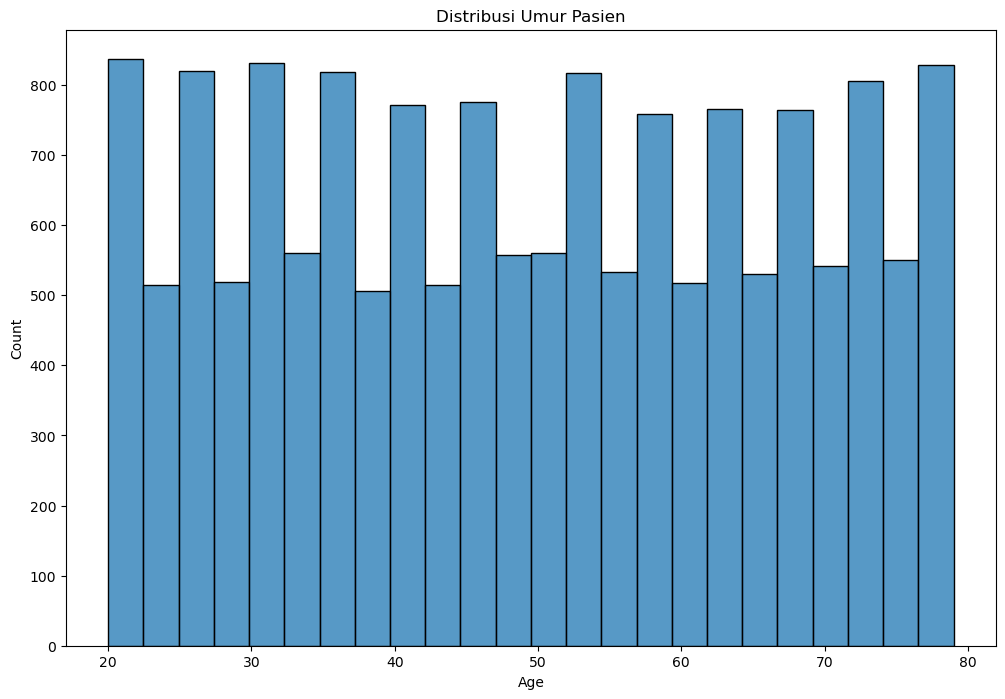

In [81]:
plt.figure(figsize=(12,8))
sns.histplot(df_plot, x='Age')
plt.title('Distribusi Umur Pasien')

Text(0.5, 1.0, 'Distribusi Ukuran Tumor Pasien')

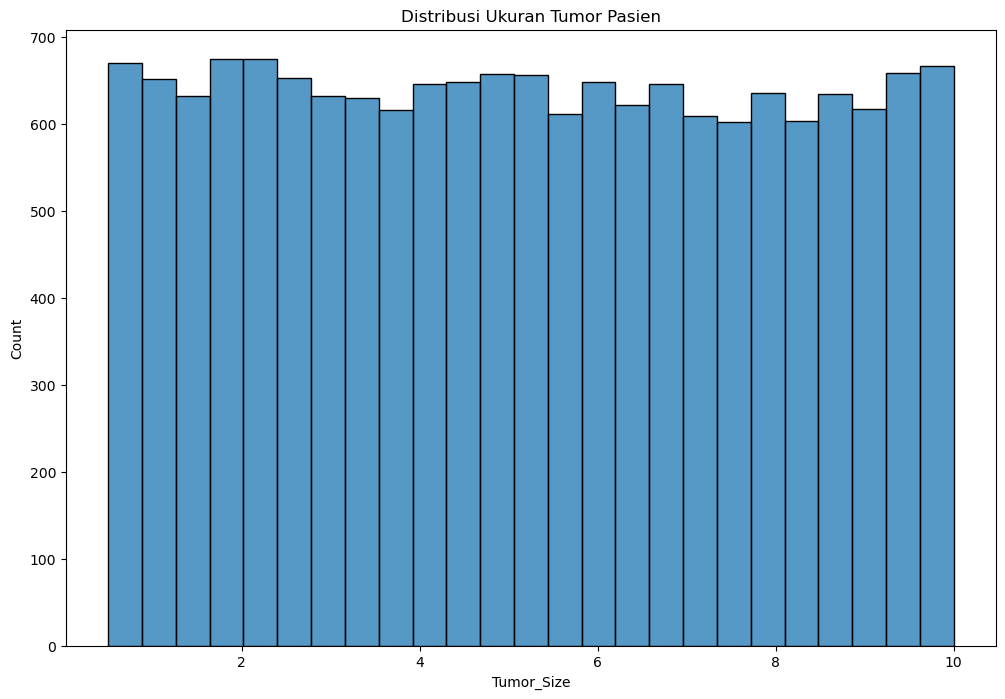

In [82]:
plt.figure(figsize=(12,8))
sns.histplot(df_plot, x='Tumor_Size')
plt.title('Distribusi Ukuran Tumor Pasien')

Text(0.5, 1.0, 'Distribusi Peluang kehidupan Pasien')

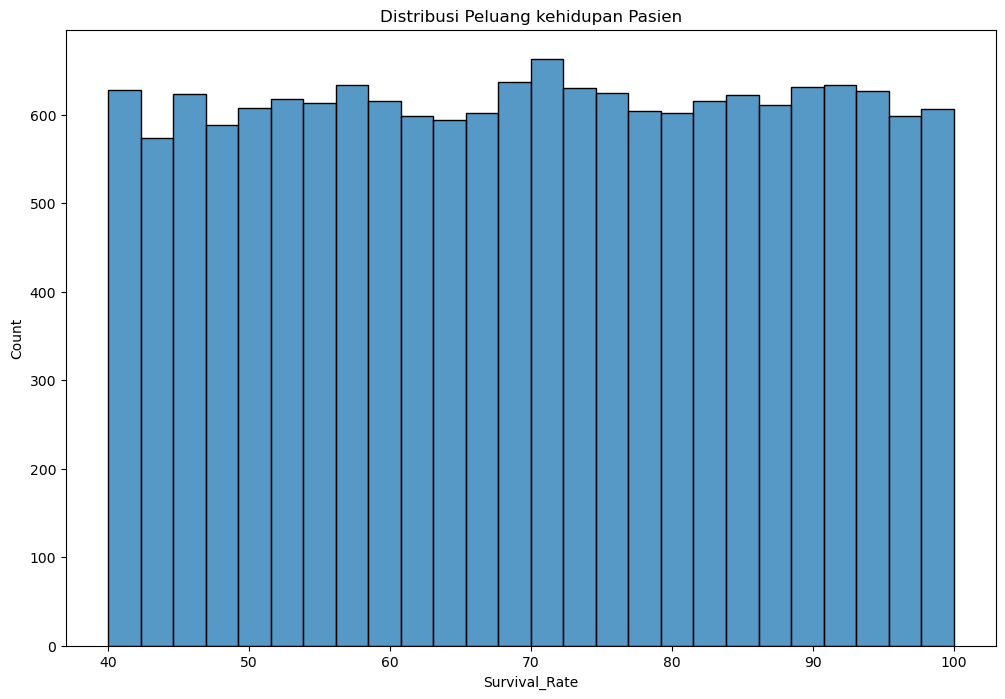

In [83]:
plt.figure(figsize=(12,8))
sns.histplot(df_plot, x='Survival_Rate')
plt.title('Distribusi Peluang kehidupan Pasien')

Text(0.5, 1.0, 'Distribusi Pertumbuhan Tumor Pasien')

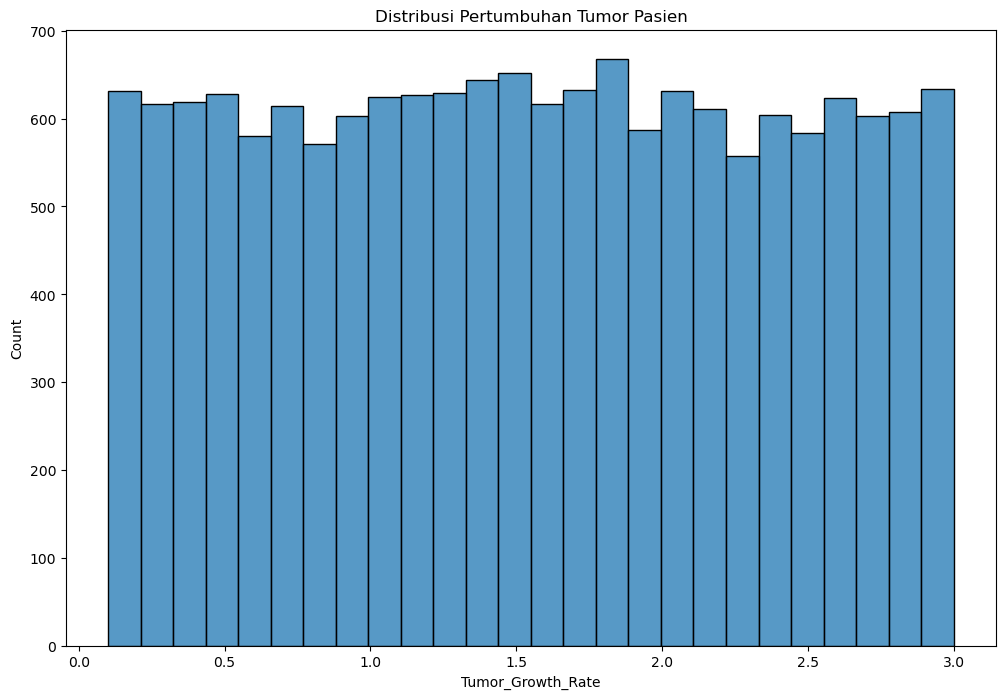

In [84]:
plt.figure(figsize=(12,8))
sns.histplot(df_plot, x='Tumor_Growth_Rate')
plt.title('Distribusi Pertumbuhan Tumor Pasien')

## Visualisasi Fitur Kategorikal

Text(0.5, 1.0, 'Distribusi Stage Tumor di Setiap Lokasi')

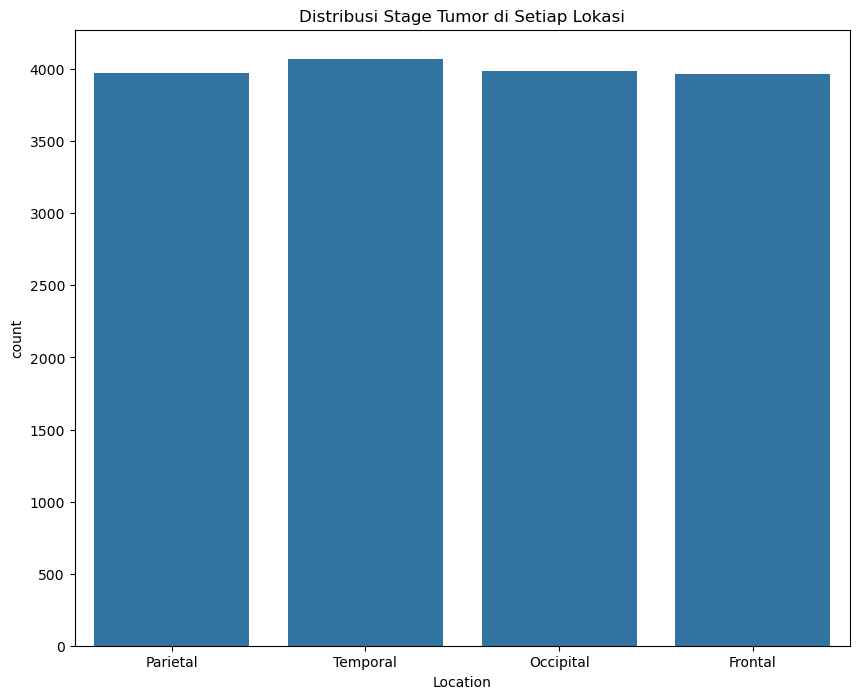

In [85]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Location')
plt.title('Distribusi Stage Tumor di Setiap Lokasi')

In [87]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 19881 to 14591
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  16000 non-null  int64  
 1   Gender               16000 non-null  object 
 2   Tumor_Size           16000 non-null  float64
 3   Location             16000 non-null  object 
 4   Histology            16000 non-null  object 
 5   Stage                16000 non-null  object 
 6   Symptom_1            16000 non-null  object 
 7   Symptom_2            16000 non-null  object 
 8   Symptom_3            16000 non-null  object 
 9   Radiation_Treatment  16000 non-null  object 
 10  Surgery_Performed    16000 non-null  object 
 11  Chemotherapy         16000 non-null  object 
 12  Survival_Rate        16000 non-null  float64
 13  Tumor_Growth_Rate    16000 non-null  float64
 14  Family_History       16000 non-null  object 
 15  MRI_Result           16000 non-null  

Text(0.5, 1.0, 'Frekuensi Setiap Tipe Histologi')

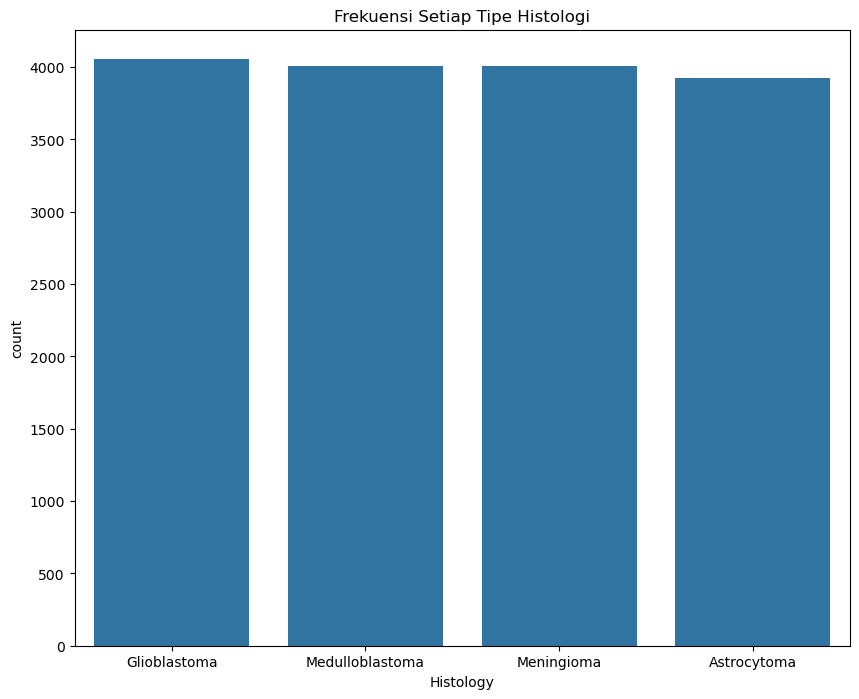

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Histology')
plt.title('Frekuensi Setiap Tipe Histologi')

Text(0.5, 1.0, 'Distribusi Stadium Tumor')

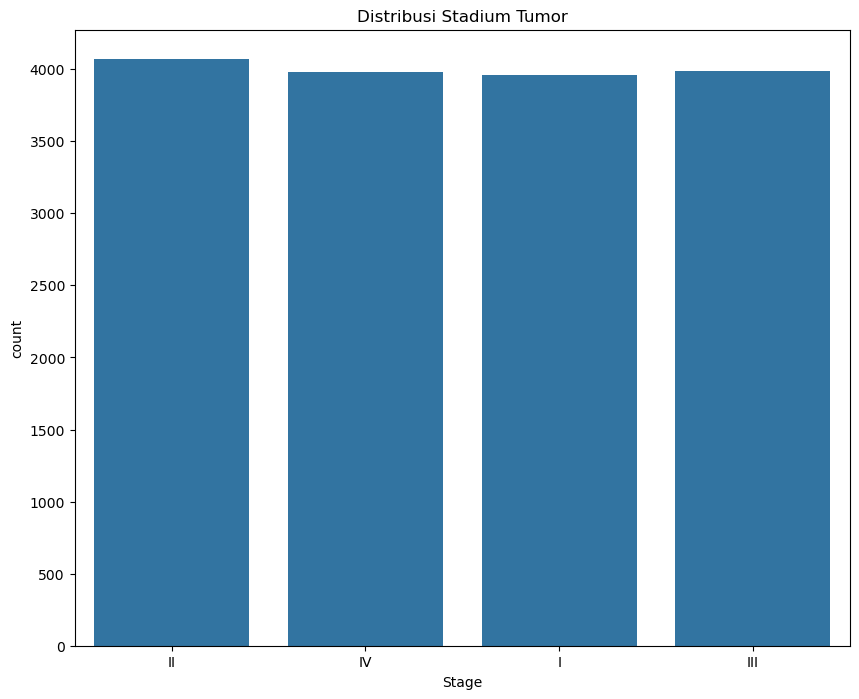

In [92]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Stage')
plt.title('Distribusi Stadium Tumor')

Text(0.5, 1.0, 'Distribusi Pasien Berdasarkan Terapi Radiasi')

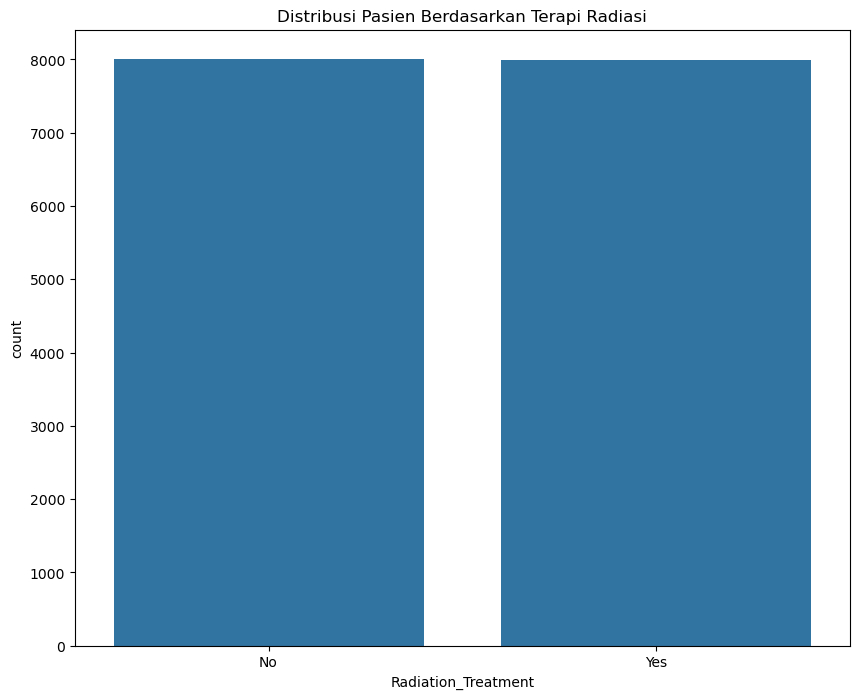

In [94]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Radiation_Treatment')
plt.title('Distribusi Pasien Berdasarkan Terapi Radiasi')

Text(0.5, 1.0, 'Persebaran Kategori Surgery Performed')

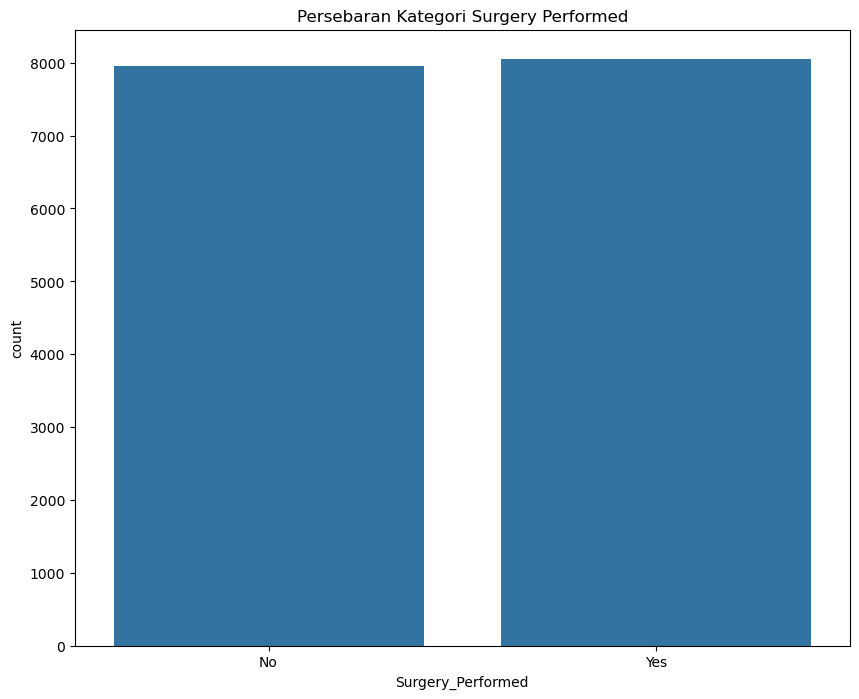

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Surgery_Performed')
plt.title('Persebaran Kategori Surgery Performed')

Text(0.5, 1.0, 'Distribusi Pasien Berdasarkan Kemoterapi')

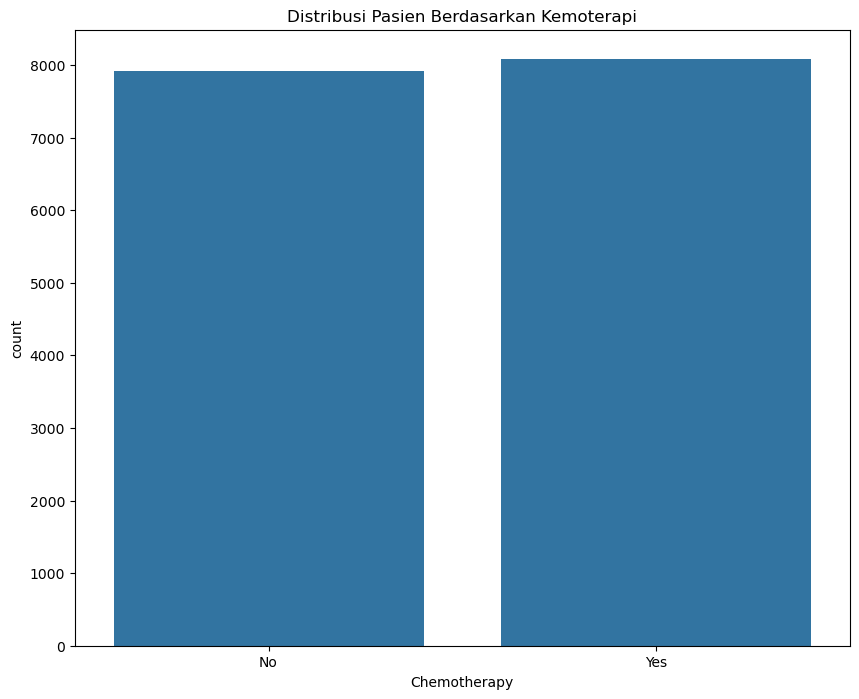

In [98]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Chemotherapy')
plt.title('Distribusi Pasien Berdasarkan Kemoterapi')

Text(0.5, 1.0, 'Frekuensi Riwayat Kanker dalam Keluarga')

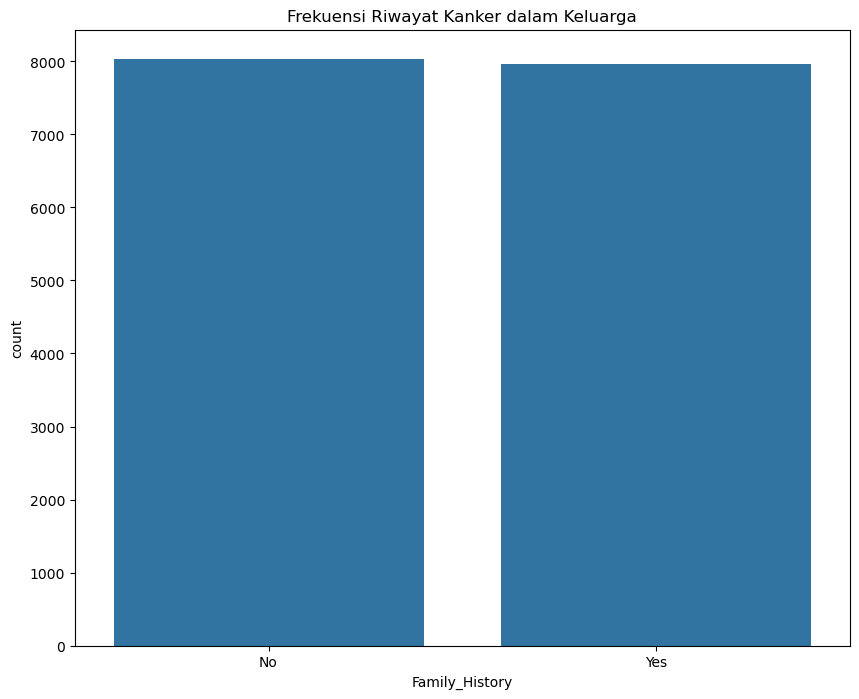

In [101]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Family_History')
plt.title('Frekuensi Riwayat Kanker dalam Keluarga')

Text(0.5, 1.0, 'Frekuensi Kategori MRI Result')

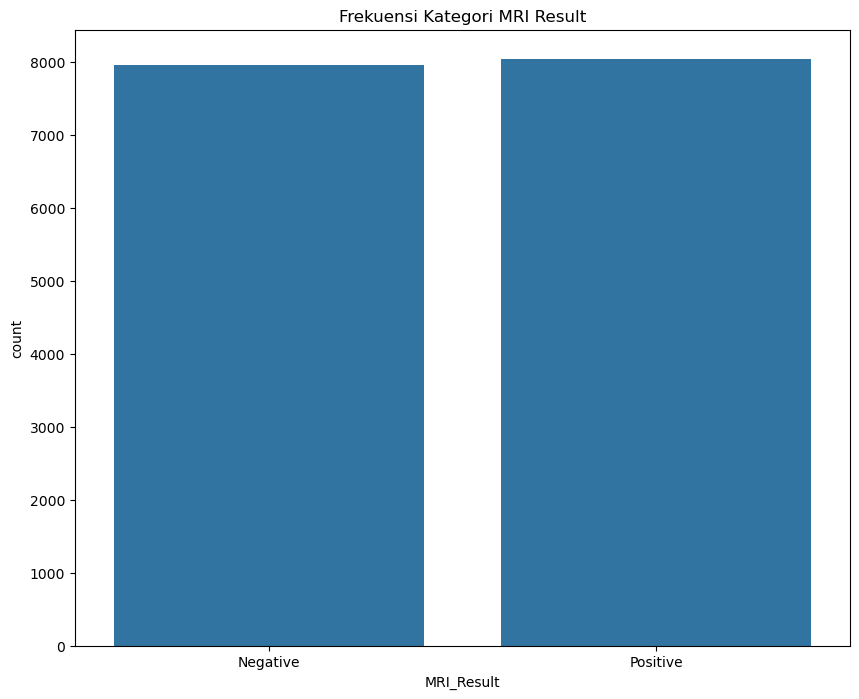

In [103]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='MRI_Result')
plt.title('Frekuensi Kategori MRI Result')

Text(0.5, 1.0, 'Frekuensi Follow-Up Pasien')

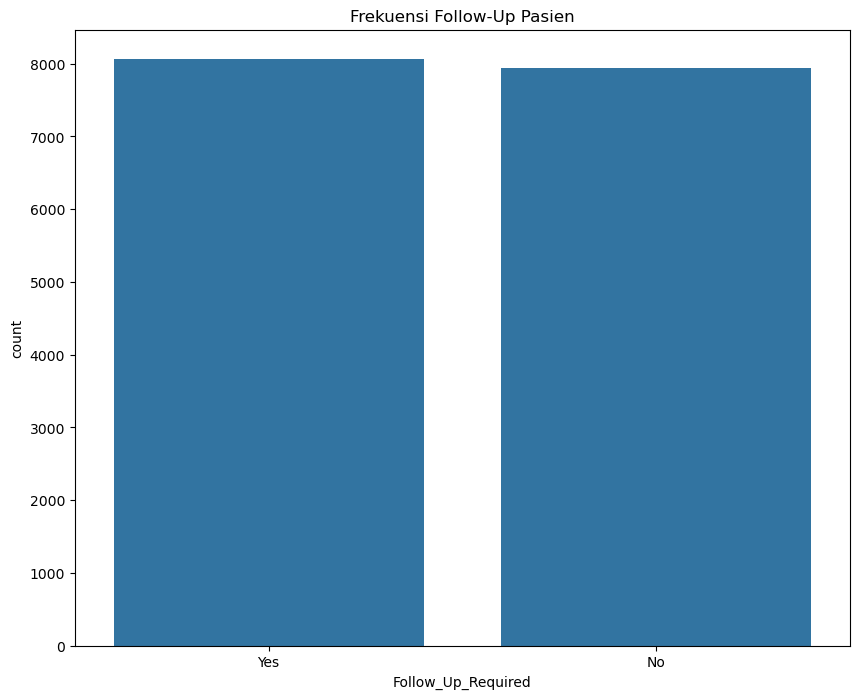

In [106]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Follow_Up_Required')
plt.title('Frekuensi Follow-Up Pasien')

Text(0.5, 1.0, 'Frekuensi Setiap Jenis Diagnosis')

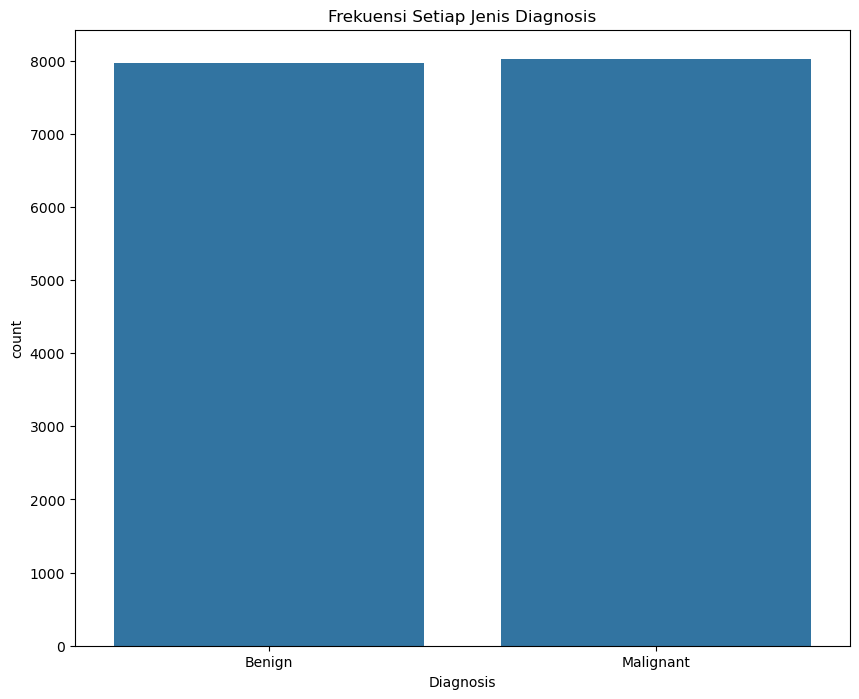

In [108]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Diagnosis')
plt.title('Frekuensi Setiap Jenis Diagnosis')

Text(0.5, 1.0, 'Distribusi Pasien Berdasarkan Gejala 1')

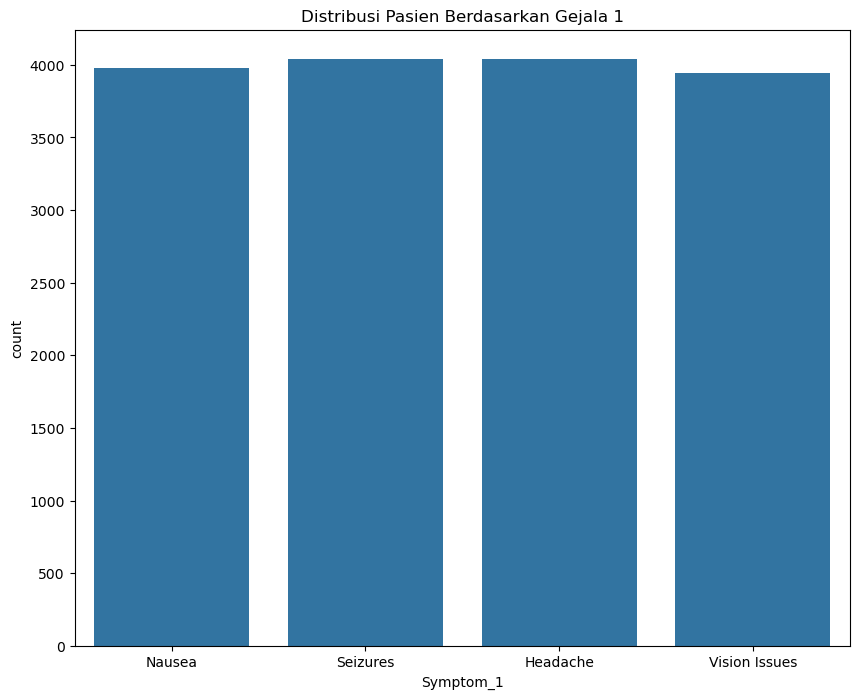

In [114]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Symptom_1')
plt.title('Distribusi Pasien Berdasarkan Gejala 1')

Text(0.5, 1.0, 'Distribusi Pasien Berdasarkan Gejala 2')

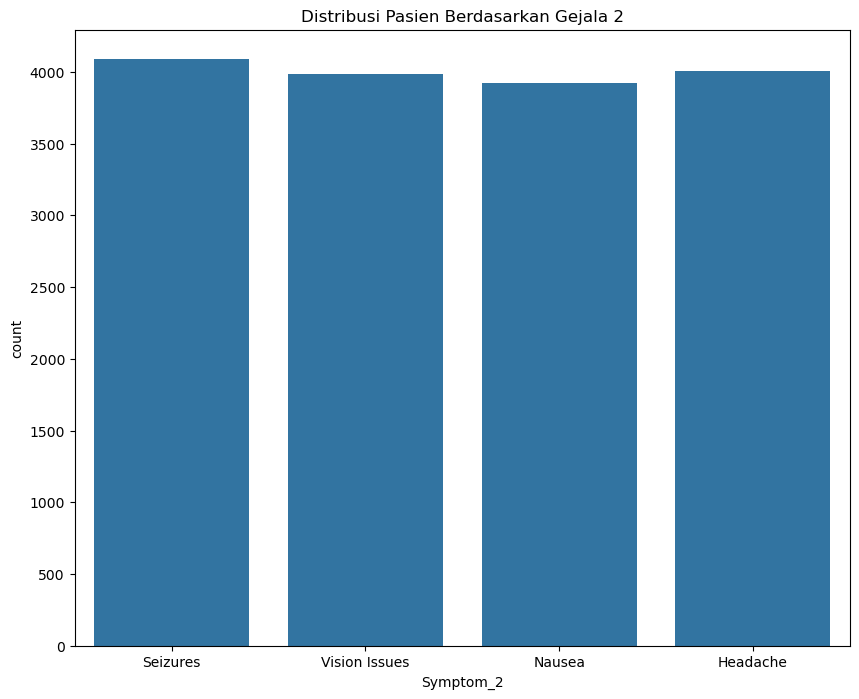

In [112]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Symptom_2')
plt.title('Distribusi Pasien Berdasarkan Gejala 2')

Text(0.5, 1.0, 'Distribusi Pasien Berdasarkan Gejala 3')

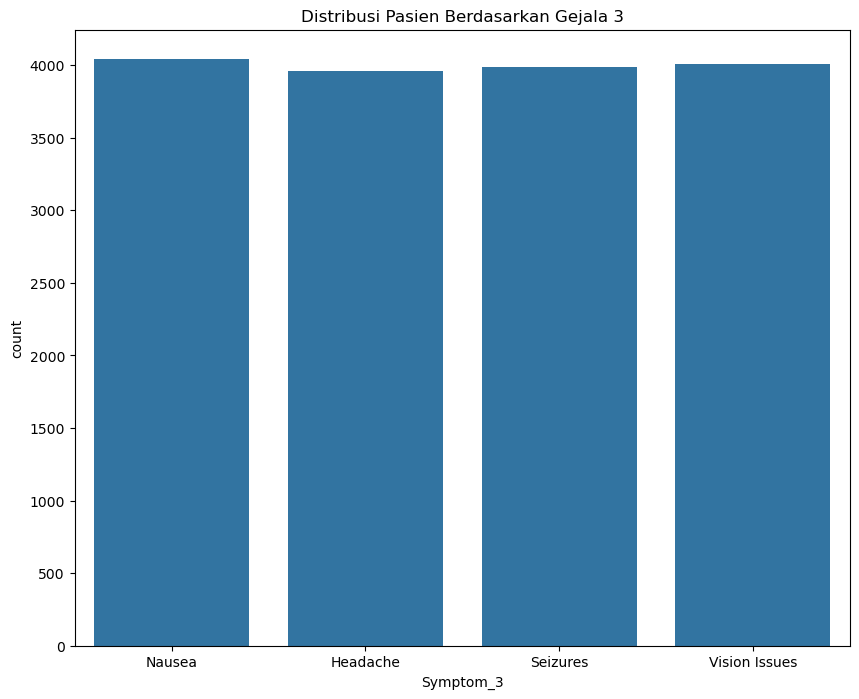

In [113]:
plt.figure(figsize=(10, 8))
sns.countplot(df_plot, x='Symptom_3')
plt.title('Distribusi Pasien Berdasarkan Gejala 3')

## Kesimpulan untuk distribusi setiap fitur
- Setelah dilakukan visualisasi untuk melihat distribusi setiap fitur kami dapati bahwa semua fitur memiliki **Distribusi Normal**.
- Tidak perlu melakukan Oversampling/Undersampling.

## Hubungan corelasi

<Axes: >

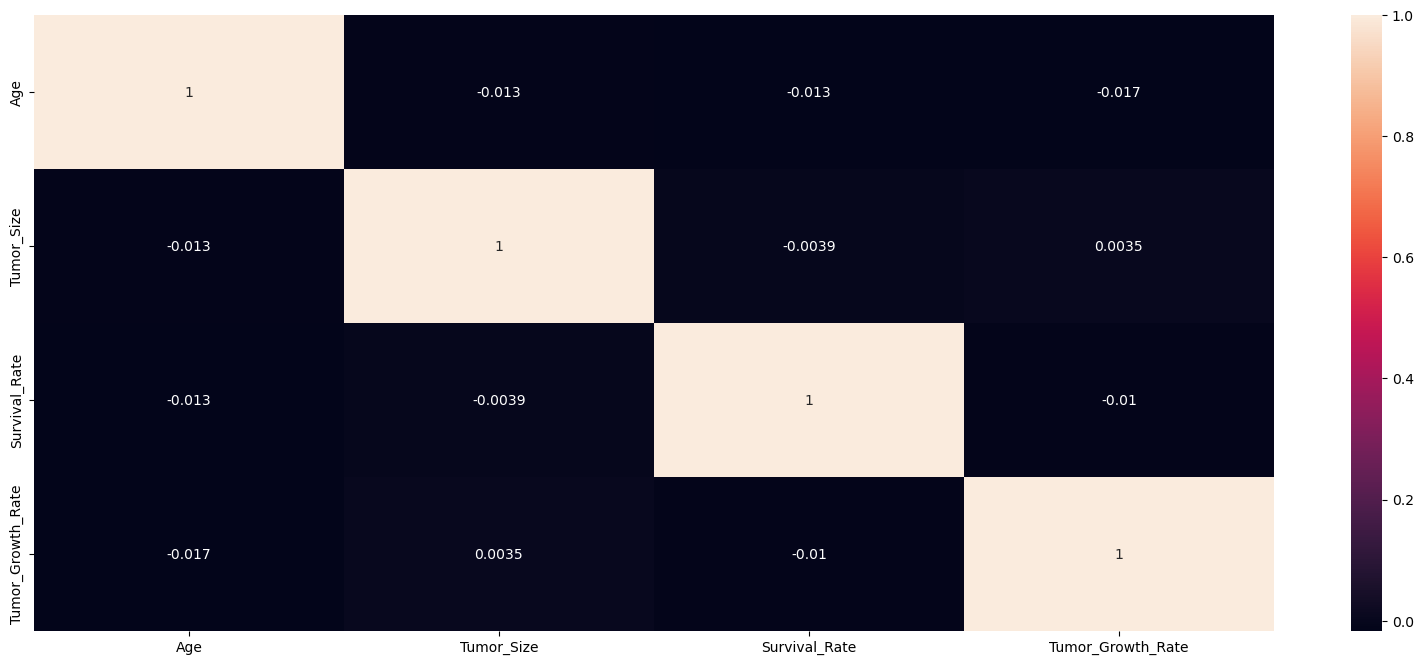

In [125]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_plot.corr(numeric_only=True), annot=True)